## Observations and Insights 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
# Checking the number of mice.
merge_table['Mouse ID'].value_counts()

g989    13
s710    10
c139    10
u327    10
m601    10
        ..
x336     1
x226     1
u153     1
b447     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [61]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicatedIDTimepointRows = merge_table[merge_table.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicatedIDTimepointRows)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedIDRows = merge_table[merge_table.duplicated(['Mouse ID'])]
print(duplicatedIDRows)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
5        k403     Ramicane  Male          21          16         25   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
1              38.825898                 0  
2              35.014271                 1  
3           

In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_table = duplicatedIDRows.drop_duplicates(subset='Mouse ID', keep="first")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
41,g791,Ramicane,Male,11,16,5,45.851531,0


In [64]:
# Checking the number of mice in the clean DataFrame.
merge_table['Mouse ID'].value_counts()

s710    1
k862    1
i386    1
d474    1
z234    1
       ..
t451    1
z578    1
n364    1
f278    1
l215    1
Name: Mouse ID, Length: 237, dtype: int64

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,44.266086,45.597064,5.030889,2.242964,0.448593
Ceftamin,46.503051,46.370798,0.568299,0.753856,0.164505
Infubinol,46.541247,46.870483,5.689821,2.385335,0.477067
Ketapril,47.389175,47.059664,1.612964,1.270025,0.264819
Naftisol,46.796098,46.621301,0.942076,0.970606,0.202385


## Bar and Pie Charts

In [66]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()
# Filter the DataFrame down only to those columns to chart
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
# Set the index to be "Drug Regimen" so they will be used as labels
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")


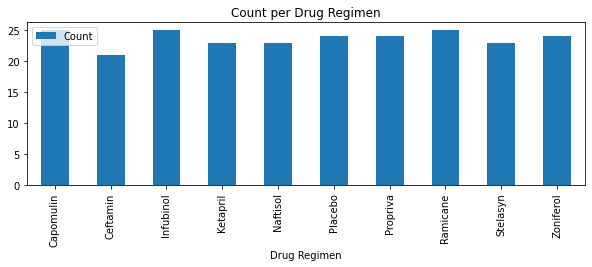

<Figure size 432x288 with 0 Axes>

In [67]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Use DataFrame.plot() in order to create a bar chart of the data
regimen_datapoints.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()


In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# select column to convert to list here
drug_regimens = summary_df.index.tolist()
drug_regimens


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

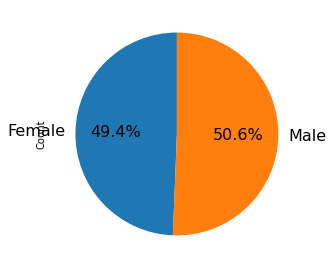

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()

gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)


## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
merge_table.head()
# Start by getting the last (greatest) timepoint for each mouse
sorted_df = merge_table.sort_values(["Timepoint"], ascending=True)
sorted_df.head()
# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 5]
max_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,1,k403,Ramicane,Male,21,16,5,38.825898,0
1,1262,o302,Placebo,Female,2,29,5,48.937012,0
2,1269,o331,Ketapril,Male,24,30,5,47.059664,1
3,1279,o523,Propriva,Female,6,25,5,45.544700,0
4,1282,o562,Propriva,Female,4,25,5,46.514950,1


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
drug_count = (max_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count 

# Create empty list to fill with tumor vol data (for plotting)
capo_obj = max_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_obj = capo_obj["Tumor Volume (mm3)"]
capo_obj

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of temperatures is: 45.758596672500005
The upper quartile of temperatures is: 47.26039652
The interquartile range of temperatures is: 1.5017998474999956
The median of temperatures is: 46.53402001
Values below 43.50589690125001 could be outliers.
Values above 49.513096291249994 could be outliers.


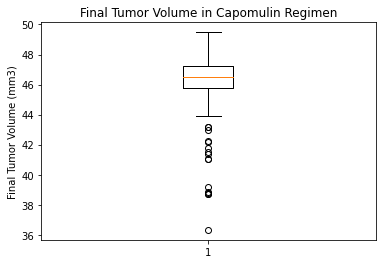

In [72]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()

## Line and Scatter Plots

In [73]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()
capo_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "j246"]
capo_mouse


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
15,311,j246,Capomulin,Female,21,21,5,45.641438,0


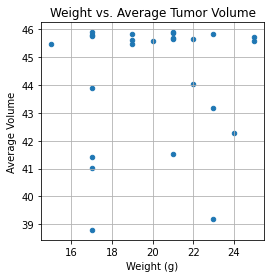

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()
avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo.head()
avg_capo = avg_capo.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capo.head()
avg_capo.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [78]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_capo.iloc[:,0]
avg_tumor_volume = avg_capo.iloc[:,1]
# # We then compute the Pearson correlation coefficient between "Mouse Weight" and "Average Tumor Volume"
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)


TypeError: unsupported operand type(s) for +: 'float' and 'str'